<a href="https://colab.research.google.com/github/Murcha1990/ML_AI25/blob/main/Hometasks/Base/HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base). Часть 1**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;

**Максимальная оценка за дз**
> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.**

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

Мы фиксируем `seed`, чтобы результаты экспериментов можно было воспроизвесит на разных устройствах:

Во многих местах прямо или косвено используется случайность, ГСЧ и тд. В итоге, мы не можем справедливо оценивать модель, если каждый будет использовать свои сиды. Конкретно в домашке это нужно для того, чтобы проверяющий получить такие же результаты как и я.


# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [2]:
train_url = 'https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv'
test_url  = 'https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv'

try:
    df_train = pd.read_csv(train_url)
    df_test  = pd.read_csv(test_url)
except Exception as e:
    print("Не удалось скачать датасеты по ссылке, юзаем локальные файлы:", e)
    df_train = pd.read_csv('cars_train.csv')
    df_test  = pd.read_csv('cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)


Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.5 балла)**

Вы уже встречались с pandas в первой половине семестра. Теперь будем постоянно (кроме некоторых случаев) использовать его для анализа данных и наслаивать навыки. Выполните операции, направленные на практику основных действий с `pandas`:

**0.1 балла**
- [ ] Отобразите 30 случайных строк тренировочного датасета.
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
- [ ] Посмотрите, есть ли в данных явные дубликаты


**0.2 балла**
Ответьте на вопросы:
- [ ] Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?
- [ ] Достаточно ли метода duplicated для анализа дубликатов? Почему?

**0.15 балла**
- [ ] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)

In [3]:
from IPython.display import display

# 30 случайных строк из train
display(df_train.sample(30, random_state=42))

# первые 5 и последние 5 строк test
display(df_test.head(5))
display(df_test.tail(5))

# пропуски
na_cols = df_train.columns[df_train.isna().any()].tolist()
print("Колонки с пропусками в train:", na_cols)
print(df_train[na_cols].isna().sum(), "\n")

na_cols_test = df_test.columns[df_test.isna().any()].tolist()
print("Колонки с пропусками в test:", na_cols_test)
print(df_test[na_cols_test].isna().sum(), "\n")

# явные (полные) дубликаты строк
print("Полных дубликатов строк в train:", df_train.duplicated().sum())
print("Полных дубликатов строк в test :", df_test.duplicated().sum())


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


Колонки с пропусками в train: ['mileage', 'engine', 'max_power', 'torque', 'seats']
mileage      202
engine       202
max_power    196
torque       203
seats        202
dtype: int64 

Колонки с пропусками в test: ['mileage', 'engine', 'max_power', 'torque', 'seats']
mileage      19
engine       19
max_power    19
torque       19
seats        19
dtype: int64 

Полных дубликатов строк в train: 985
Полных дубликатов строк в test : 62


Мы обнаружили пропуски. Давайте избавимся от них.

**(0.05 балла)**
- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [4]:
import re

def extract_first_number(x):
    """
    Берём первое число из строки
    """
    if pd.isna(x):
        return np.nan
    m = re.search(r"[-+]?\d*\.?\d+", str(x))
    return float(m.group(0)) if m else np.nan

# для колонок со строковыми значениями считаем медиану по извлечённым числам на TRAIN,
# затем заполняем и train, и test
cols_with_na = ['mileage', 'engine', 'max_power', 'torque']
for col in cols_with_na:
    train_nums = df_train[col].map(extract_first_number)
    med = float(np.nanmedian(train_nums))
    # заполняем пропуски простым числом (потом всё равно приведём к float или удалим)
    df_train[col] = df_train[col].fillna(med)
    df_test[col]  = df_test[col].fillna(med)

# seats уже числовой. Заполним медианой по train
seats_med = float(np.nanmedian(df_train['seats']))
df_train['seats'] = df_train['seats'].fillna(seats_med)
df_test['seats']  = df_test['seats'].fillna(seats_med)

print("Пропуски в train после заполнения:\n", df_train.isna().sum())
print("Пропуски в test после заполнения:\n", df_test.isna().sum())


Пропуски в train после заполнения:
 name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64
Пропуски в test после заполнения:
 name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64


### Ответы на вопросы

1. Можно сделать выводы о структуре данных, наличии аномалий в каких то ячейках или наличие пропусков. Но нельзя ничего сказать про реальное распределение приззнаков, о наличии вбросов и корреляциях между признаками.

2. Метода dublicated не достаточно по причине того, что он находит только полные дубликаты, поэтому для детальной дедубликации он не подходит

### **Задание 2 (0.5 балла)**

На прошлом шаге вы рассмотрели дубликаты. Однако дубликат может быть связан с не только полным повторением информации в нескольких строках, но и частиным. Например, объект мог был внесен в базу данных с разным значением целевой переменной. В этом шаге займемся такими дублями!

**Ваши действия:**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [5]:
from IPython.display import display

target_col = 'selling_price'
feature_cols = [c for c in df_train.columns if c != target_col]

n_dup = df_train.duplicated(subset=feature_cols).sum()
print("Количество объектов с одинаковым признаковым описанием (без target):", n_dup)

dup_mask = df_train.duplicated(subset=feature_cols, keep=False)
display(df_train.loc[dup_mask].sort_values(feature_cols).head(50))

# удаляем дубликаты (оставляем первую строку)
df_train = df_train.drop_duplicates(subset=feature_cols, keep='first').reset_index(drop=True)
print("Новый размер train:", df_train.shape)


Количество объектов с одинаковым признаковым описанием (без target): 1159


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
1703,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
6307,Audi Q3 2.0 TDI Quattro Premium Plus,2017,2825000,22000,Diesel,Dealer,Automatic,First Owner,15.73 kmpl,1968 CC,174.33 bhp,380Nm@ 1750-2500rpm,5.0
1836,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
6704,Audi Q5 3.0 TDI Quattro,2014,1850000,76131,Diesel,Individual,Automatic,First Owner,13.22 kmpl,2967 CC,241.4 bhp,580Nm@ 1400-3250rpm,5.0
117,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
1337,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
1595,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
2787,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
4485,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0
6640,Audi Q5 35TDI Premium Plus,2018,3975000,31800,Diesel,Dealer,Automatic,First Owner,17.01 kmpl,1968 CC,188 bhp,400nm@ 1750-3000rpm,5.0


Новый размер train: (5840, 13)


In [6]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [7]:
def to_float(series: pd.Series) -> pd.Series:
    """
    Преобразуем колонку вида '19.3 kmpl' -> 19.3. Невалидные значения -> NaN.
    """
    return series.astype(str).str.extract(r"([-+]?\d*\.?\d+)")[0].astype(float)

# извлекаем числа
for col in ['mileage', 'engine', 'max_power']:
    df_train[col] = to_float(df_train[col])
    df_test[col]  = to_float(df_test[col])

# иногда встречаются значения вроде ' bhp' -> NaN; заполним медианой по train
for col in ['mileage', 'engine', 'max_power']:
    med = float(df_train[col].median())
    df_train[col] = df_train[col].fillna(med)
    df_test[col]  = df_test[col].fillna(med)

# torque удаляем
df_train = df_train.drop(columns=['torque'])
df_test  = df_test.drop(columns=['torque'])

print(df_train.dtypes)
print("Train shape:", df_train.shape)
print("Test shape :", df_test.shape)


name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object
Train shape: (5840, 12)
Test shape : (1000, 12)


### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [8]:
# приведём типы к более подходящим

# seats после заполнения могли стать float из-за NaN -> вернём к int
df_train['seats'] = df_train['seats'].round().astype(int)
df_test['seats']  = df_test['seats'].round().astype(int)

# year, km_driven, selling_price уже int, оставим как есть
# категориальные столбцы -> category
cat_cols = ['fuel', 'seller_type', 'transmission', 'owner']
for col in cat_cols:
    df_train[col] = df_train[col].astype('category')
    df_test[col]  = df_test[col].astype('category')

df_train.dtypes


name               object
year                int64
selling_price       int64
km_driven           int64
fuel             category
seller_type      category
transmission     category
owner            category
mileage           float64
engine            float64
max_power         float64
seats               int64
dtype: object

### **Задание 5 (0.15 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [ ] Сделайте вывод.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [9]:
# Числовые статистики
display(df_train.describe())
display(df_test.describe())

# Категориальные статистики
display(df_train.describe(include=['object', 'category']))
display(df_test.describe(include=['object', 'category']))


,year,selling_price,km_driven,mileage,engine,max_power,seats
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.428611,1429.448973,87.910758,5.426712
std,4.095622,5.354320e+05,6.007114e+04,3.986026,485.662834,31.639589,0.982344
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.950000,1197.000000,68.000000,5.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.300000,1248.000000,81.860000,5.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.300000,1498.000000,99.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


,year,selling_price,km_driven,mileage,engine,max_power,seats
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,2013.681000,6.179010e+05,71393.341000,19.337480,1454.87600,90.844330,5.403000
std,4.012149,7.585539e+05,48486.218662,3.951751,521.99574,34.892709,0.912921
min,1995.000000,3.100000e+04,1303.000000,0.000000,624.00000,34.200000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,16.550000,1197.00000,69.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,19.300000,1248.00000,82.425000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,22.300000,1582.00000,102.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,32.260000,3604.00000,280.000000,9.000000


,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


Вывод: распределения и диапазоны числовых признаков в train и test в целом похожи, по категориальным признакам наборы категорий также совпадают/очень близки. Это хороший признак: модель, обученная на train, должна быть применима к test.

In [10]:
assert df_train.shape == (5840, 12)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

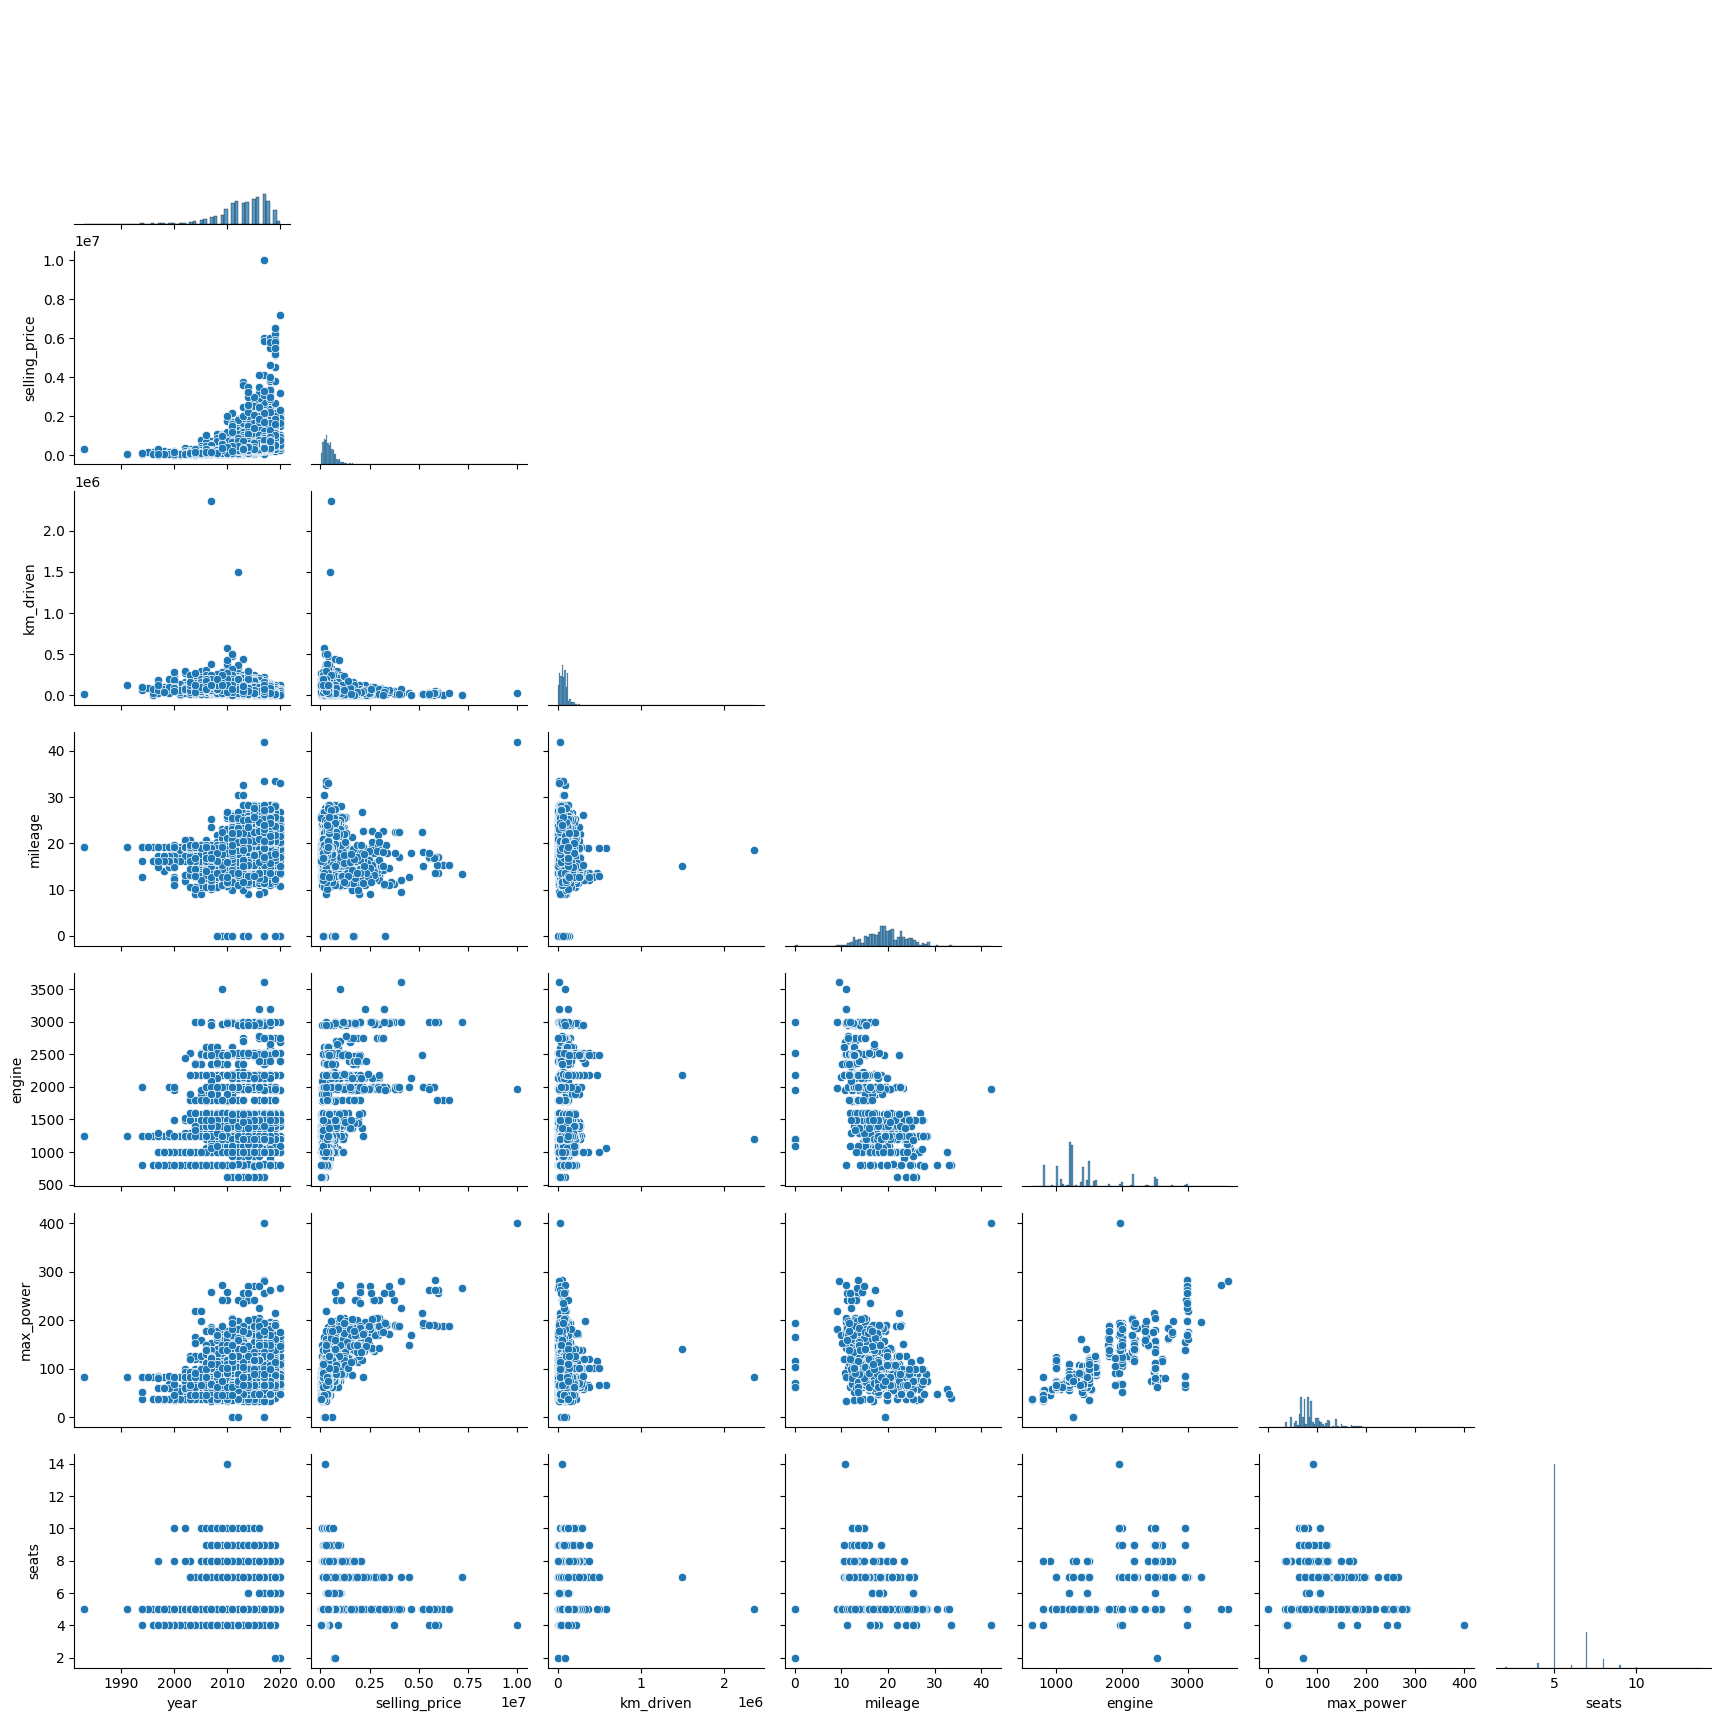

In [11]:
# Pairplot для train (числовые признаки)
num_cols = df_train.select_dtypes(include=['number']).columns
sns.pairplot(df_train[num_cols], corner=True)
plt.show()


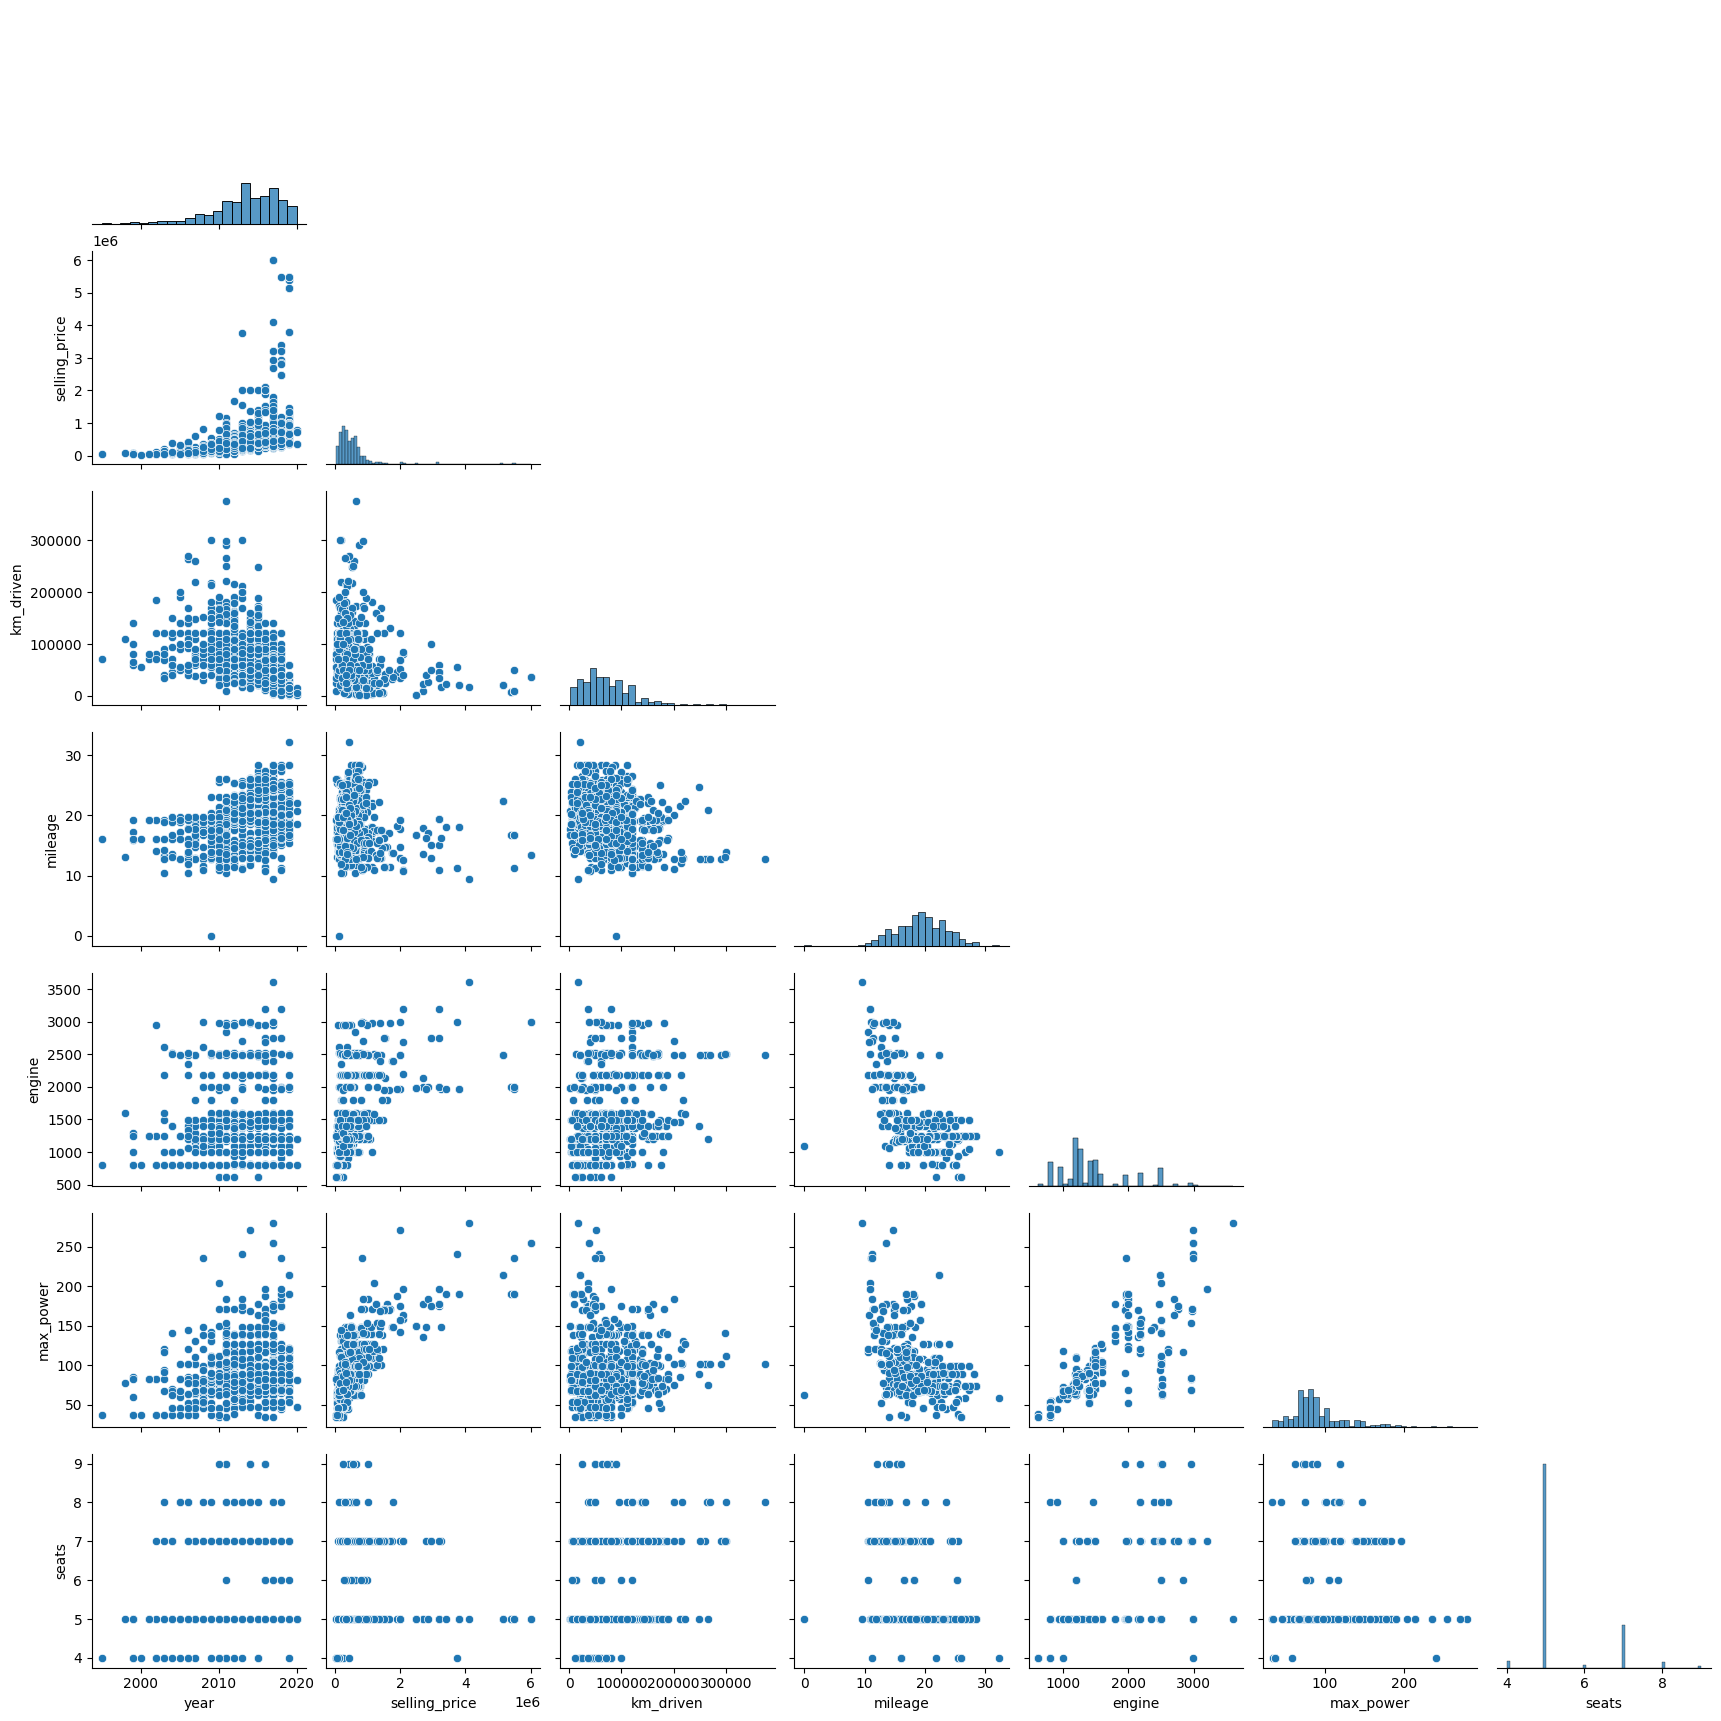

In [12]:
# Pairplot для test (числовые признаки)
num_cols_test = df_test.select_dtypes(include=['number']).columns
sns.pairplot(df_test[num_cols_test], corner=True)
plt.show()


По pairplot видно, что наиболее заметная связь с ценой наблюдается у max_power(чем больше мощность- тем выше цена),
а также у `engine` и `year` (новее/больше объём - обычно дороже).  
km_driven и частично `mileage` демонстрируют обратную тенденцию: чем больше пробег/выше «изношенность», тем ниже цена.

Сравнение train vs test: визуально распределения числовых признаков и их взаимосвязи очень похожи, 
что говорит о корректном разделении(сильного сдвига распределений не видно).


### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


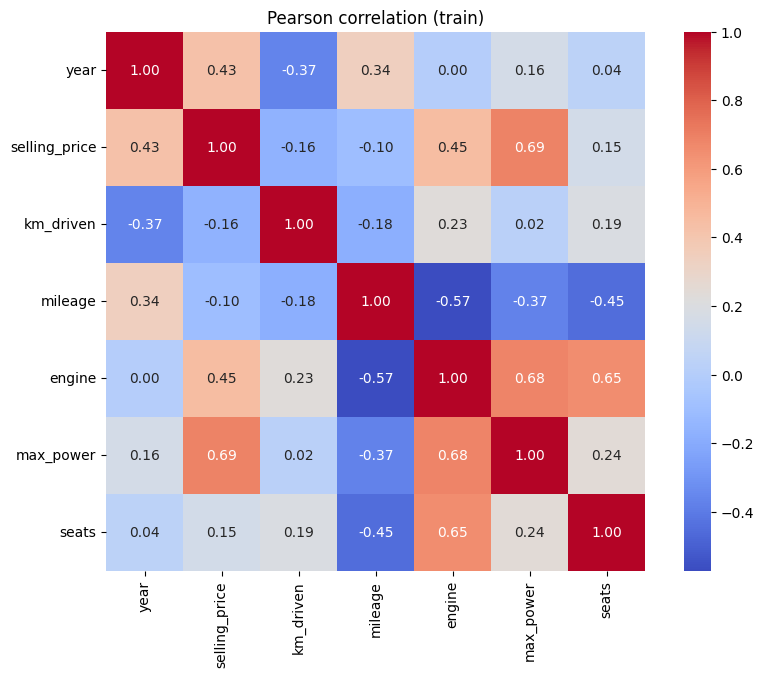

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.427279,-0.368966,0.342172,0.002819,0.156650,0.041178
selling_price,0.427279,1.000000,-0.164828,-0.104458,0.447672,0.692755,0.149953
km_driven,-0.368966,-0.164828,1.000000,-0.182245,0.229766,0.024629,0.192328
mileage,0.342172,-0.104458,-0.182245,1.000000,-0.572677,-0.373269,-0.450810
engine,0.002819,0.447672,0.229766,-0.572677,1.000000,0.681083,0.652172
max_power,0.156650,0.692755,0.024629,-0.373269,0.681083,1.000000,0.244058
seats,0.041178,0.149953,0.192328,-0.450810,0.652172,0.244058,1.000000


In [13]:
# Корреляции Пирсона по train и тепловая карта
num_cols = df_train.select_dtypes(include=['number']).columns
corr = df_train[num_cols].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title("Pearson correlation (train)")
plt.show()

corr


- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

- Наименее скоррелированные признаки - `year` и `engine` почти 0.
- Довольно сильная положительная линейная зависимость наблюдается между `engine` и `max_power` и, ожидаемо, между `selling_price` и `max_power`
- Про «год выпуска и пробег»: в среднем да, можно говорить о тенденции - более старые машины имеют больший `km_driven`, но это не строгий закон для каждого отдельного авто(что в целом тоже объяснимо различным использованием авто)


### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

- Каждая дополнительная визуализация может принести до 0.25 баллов при условии, что она обоснована.

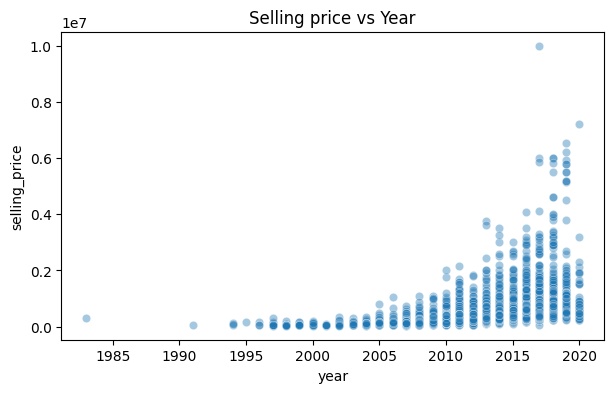

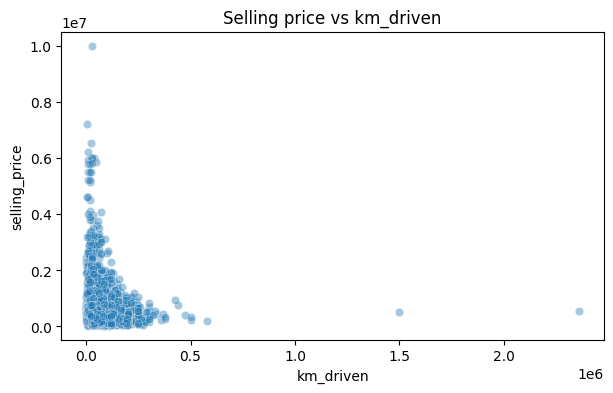

In [14]:
# цена vs год и цена vs пробег
# хочется более подробно посмотреть зависимости
plt.figure(figsize=(7,4))
sns.scatterplot(data=df_train, x='year', y='selling_price', alpha=0.4)
plt.title("Selling price vs Year")
plt.show()

plt.figure(figsize=(7,4))
sns.scatterplot(data=df_train, x='km_driven', y='selling_price', alpha=0.4)
plt.title("Selling price vs km_driven")
plt.show()


# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Сделайте тренировочный и тестовый наборы. Сделайте на тренировочный и тестовый наборы. Она уже даны, достаточно просто отделить целевой признак Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных. Используйте уже имеющиеся данные train и test при разбиении. Если считаете уместным применить какую-то более хитрую технику разбиения — примените, но опишите, зачем.

In [15]:
# Целевая переменная
y_train = df_train['selling_price']
# только вещественные/числовые признаки
real_features = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']
X_train = df_train[real_features]

In [16]:
y_test = df_test['selling_price']
X_test = df_test[real_features]

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

lr_raw = LinearRegression()
lr_raw.fit(X_train, y_train)

y_pred_train_lr = lr_raw.predict(X_train)
y_pred_test_lr  = lr_raw.predict(X_test)

print("LinearRegression")
print("R2 train:", r2_score(y_train, y_pred_train_lr))
print("R2 test :", r2_score(y_test, y_pred_test_lr))
print("MSE train:", MSE(y_train, y_pred_train_lr))
print("MSE test :", MSE(y_test, y_pred_test_lr))


LinearRegression
R2 train: 0.5922623783422509
R2 test : 0.5941437497377141
MSE train: 116873234357.97382
MSE test : 233297762135.1048


### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # fit только на train
X_test_scaled  = scaler.transform(X_test)

lr_scaled = LinearRegression()
lr_scaled.fit(X_train_scaled, y_train)

y_pred_train_lr_scaled = lr_scaled.predict(X_train_scaled)
y_pred_test_lr_scaled  = lr_scaled.predict(X_test_scaled)

print("LinearRegression (scaled features)")
print("R2 train:", r2_score(y_train, y_pred_train_lr_scaled))
print("R2 test :", r2_score(y_test, y_pred_test_lr_scaled))
print("MSE train:", MSE(y_train, y_pred_train_lr_scaled))
print("MSE test :", MSE(y_test, y_pred_test_lr_scaled))


LinearRegression (scaled features)
R2 train: 0.5922623783422503
R2 test : 0.5941437497377251
MSE train: 116873234357.974
MSE test : 233297762135.0985


### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [19]:
import numpy as np
import pandas as pd

coefs = pd.Series(lr_scaled.coef_, index=real_features).sort_values(key=lambda s: np.abs(s), ascending=False)
display(coefs)

max_power    322780.470552
year         152842.366736
engine        61174.707068
km_driven    -44148.208054
mileage       28780.664760
seats        -23218.825646
dtype: float64

Самым информативным оказался - max_power

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [20]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error as MSE
import numpy as np
import pandas as pd

lasso_default = Lasso(random_state=42, max_iter=50000)
lasso_default.fit(X_train_scaled, y_train)

y_pred_train_lasso = lasso_default.predict(X_train_scaled)
y_pred_test_lasso  = lasso_default.predict(X_test_scaled)

print("Lasso (default alpha=1.0)")
print("R2 train:", r2_score(y_train, y_pred_train_lasso))
print("R2 test :", r2_score(y_test, y_pred_test_lasso))
print("MSE train:", MSE(y_train, y_pred_train_lasso))
print("MSE test :", MSE(y_test, y_pred_test_lasso))


Lasso (default alpha=1.0)
R2 train: 0.5922623783069674
R2 test : 0.5941425824839774
MSE train: 116873234368.08743
MSE test : 233298433105.88434


In [21]:
import pandas as pd

lasso_coefs = pd.Series(lasso_default.coef_, index=real_features)
display(lasso_coefs)

n_zeros = int((lasso_coefs == 0).sum())
print("Сколько коэффициентов занулилось:", n_zeros)


year         152842.188220
km_driven    -44147.079079
mileage       28778.782255
engine        61169.875658
max_power    322781.353553
seats        -23215.948673
dtype: float64

Сколько коэффициентов занулилось: 0


Кажется, что при alpha по умолчанию регуляризация может быть слишком слабой относительно масштаба целевой переменной, поэтому веса почти не зануляются. Если увеличить alpha, зануление станет заметнее.

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
import numpy as np

alphas = np.logspace(-1, 6, 15)  # сетка по alpha (можно менять при желании)
gs_lasso = GridSearchCV(
    estimator=Lasso(random_state=42, max_iter=50000),
    param_grid={'alpha': alphas},
    cv=10,
    scoring='r2',
    n_jobs=-1
)
gs_lasso.fit(X_train_scaled, y_train)

print("Lasso GridSearch done.")
print("Best params:", gs_lasso.best_params_)
print("Best CV R2:", gs_lasso.best_score_)
print("Сколько моделей обучено:", len(alphas) * gs_lasso.n_splits_)


Lasso GridSearch done.
Best params: {'alpha': np.float64(31622.776601683792)}
Best CV R2: 0.5747343208110861
Сколько моделей обучено: 150


In [23]:
from sklearn.metrics import r2_score, mean_squared_error as MSE
import pandas as pd
import numpy as np

lasso_best = gs_lasso.best_estimator_

y_pred_train_lasso_best = lasso_best.predict(X_train_scaled)
y_pred_test_lasso_best  = lasso_best.predict(X_test_scaled)

print("Lasso (best by CV)")
print("R2 train:", r2_score(y_train, y_pred_train_lasso_best))
print("R2 test :", r2_score(y_test, y_pred_test_lasso_best))
print("MSE train:", MSE(y_train, y_pred_train_lasso_best))
print("MSE test :", MSE(y_test, y_pred_test_lasso_best))

coefs_best = pd.Series(lasso_best.coef_, index=real_features)
n_zeros = int((coefs_best == 0).sum())
print("Лучший alpha:", lasso_best.alpha)
print("Занулилось коэффициентов:", n_zeros)


Lasso (best by CV)
R2 train: 0.5802415576335704
R2 test : 0.5589443251528934
MSE train: 120318862431.60806
MSE test : 253531396528.50168
Лучший alpha: 31622.776601683792
Занулилось коэффициентов: 3


**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [24]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error as MSE
import numpy as np

param_grid = {
    'alpha': np.logspace(-1, 6, 10),
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
}

gs_enet = GridSearchCV(
    estimator=ElasticNet(random_state=42, max_iter=50000),
    param_grid=param_grid,
    cv=10,
    scoring='r2',
    n_jobs=-1
)
gs_enet.fit(X_train_scaled, y_train)

enet_best = gs_enet.best_estimator_
print("ElasticNet GridSearch done.")
print("Best params:", gs_enet.best_params_)
print("Best CV R2:", gs_enet.best_score_)
print("Сколько моделей обучено:", len(param_grid['alpha']) * len(param_grid['l1_ratio']) * gs_enet.n_splits_)

y_pred_test_enet = enet_best.predict(X_test_scaled)
print("R2 test (best ElasticNet):", r2_score(y_test, y_pred_test_enet))


ElasticNet GridSearch done.
Best params: {'alpha': np.float64(0.599484250318941), 'l1_ratio': 0.7}
Best CV R2: 0.5764513396847822
Сколько моделей обучено: 500
R2 test (best ElasticNet): 0.5552450561613599


# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


**Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [ ] Удалить столбец`name`

In [25]:
df_train = df_train.drop(columns=['name'])
df_test  = df_test.drop(columns=['name'])

X_train_cat = df_train.drop(columns=['selling_price'])
y_train_cat = df_train['selling_price']

X_test_cat = df_test.drop(columns=['selling_price'])
y_test_cat = df_test['selling_price']

X_train_cat.shape, X_test_cat.shape


((5840, 10), (1000, 10))

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

**Бонус 0.25 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления. Если предобработали столбец — можно закомментировать assert

### **Задание 15 (0.4 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [26]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE
import numpy as np
import pandas as pd

# категориальные + seats
cat_features = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']
num_features = [c for c in X_train_cat.columns if c not in cat_features]

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
preprocess = ColumnTransformer(
    transformers=[
        ('cat', ohe, cat_features),
        ('num', 'passthrough', num_features),
    ],
    remainder='drop'
)
X_train_ohe = preprocess.fit_transform(X_train_cat)
X_test_ohe  = preprocess.transform(X_test_cat)

ohe_fitted = preprocess.named_transformers_['cat']
for feat, cats in zip(cat_features, ohe_fitted.categories_):
    print(f"{feat}: {len(cats)} one-hot столбцов")

print("Итоговая размерность после OHE:", X_train_ohe.shape)
# обучим линейную регрессию на расширенных признаках
lr_ohe = LinearRegression()
lr_ohe.fit(X_train_ohe, y_train_cat)

y_pred_test_ohe = lr_ohe.predict(X_test_ohe)
print("LinearRegression + OHE")
print("R2 test:", r2_score(y_test_cat, y_pred_test_ohe))
print("MSE test:", MSE(y_test_cat, y_pred_test_ohe))


fuel: 4 one-hot столбцов
seller_type: 3 one-hot столбцов
transmission: 2 one-hot столбцов
owner: 5 one-hot столбцов
seats: 9 one-hot столбцов
Итоговая размерность после OHE: (5840, 28)
LinearRegression + OHE
R2 test: 0.6259102131521932
MSE test: 215037491852.8183


### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [27]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# Чтобы регуляризация работала корректно при разном масштабе числовых признаков,
# добавим стандартизацию(для one-hot можно with_mean=False)
ridge_pipe = Pipeline(steps=[
    ('preprocess', preprocess),
    ('scaler', StandardScaler(with_mean=False)),
    ('model', Ridge(random_state=42))
])

param_grid = {'model__alpha': np.logspace(-2, 4, 12)}

gs_ridge = GridSearchCV(
    estimator=ridge_pipe,
    param_grid=param_grid,
    cv=10,
    scoring='r2',
    n_jobs=-1
)
gs_ridge.fit(X_train_cat, y_train_cat)

ridge_best = gs_ridge.best_estimator_
print("Best alpha:", gs_ridge.best_params_['model__alpha'])
print("Best CV R2:", gs_ridge.best_score_)

y_pred_test_ridge = ridge_best.predict(X_test_cat)
print("R2 test (best Ridge):", r2_score(y_test_cat, y_pred_test_ridge))


Best alpha: 811.1308307896855
Best CV R2: 0.6205829682308653
R2 test (best Ridge): 0.6098510081877524


# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [ ] Реализуйте метрику `business_metric`
- [ ] Посчитайте метрику для всех обученных моделей и определеите, какая лучше всего решает задачу бизнеса

In [28]:
import numpy as np
import pandas as pd

def business_metric(y_true, y_pred):
    """
    Доля объектов, для которых относительная ошибка прогноза <= 10 процентов.
    """
    y_true = np.asarray(y_true, dtype=float)
    y_pred = np.asarray(y_pred, dtype=float)
    denom = np.where(np.abs(y_true) < 1e-12, 1.0, np.abs(y_true))
    return float(np.mean(np.abs(y_pred - y_true) <= 0.10 * denom))

results = {}

# 1) LR на сырых числовых
results['LR_raw'] = business_metric(y_test, y_pred_test_lr)

# 2) LR на стандартизованных числовых
results['LR_scaled'] = business_metric(y_test, y_pred_test_lr_scaled)

# 3) Lasso default
results['Lasso_default'] = business_metric(y_test, y_pred_test_lasso)

# 4) Lasso best
results['Lasso_best'] = business_metric(y_test, y_pred_test_lasso_best)

# 5) ElasticNet best
results['ElasticNet_best'] = business_metric(y_test, y_pred_test_enet)

# 6) LR + OneHot
results['LR_OHE'] = business_metric(y_test_cat, y_pred_test_ohe)

# 7) Ridge besе
results['Ridge_best'] = business_metric(y_test_cat, y_pred_test_ridge)

res = pd.Series(results).sort_values(ascending=False)
display(res)

best_model = res.index[0]
print("Лучшая модель по business_metric:", best_model, "=", res.iloc[0])

business_metric(y_test, y_pred_test_lr)


Ridge_best         0.263
ElasticNet_best    0.250
LR_OHE             0.249
Lasso_default      0.227
LR_scaled          0.227
LR_raw             0.227
Lasso_best         0.225
dtype: float64

Лучшая модель по business_metric: Ridge_best = 0.263


0.227

Лучшая модель - Ridge 

# **<font color="green">Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)</font>**

Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

- Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
- На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
- Визуализировать веса обученной модели (1 балл)

# **Часть 6 | Оформление репозитория и оценка сервиса (2 балла)**

**Результаты вашей работы** необходимо разместить в своём GitHub-репозитории. В этот же репозиторий позже будет добавлена вторая часть.

Под результатами первой части понимаем следующее:

---

### Обязательные файлы:

1. **`.ipynb`-ноутбук** со всеми экспериментами:

   * полный EDA,
   * все шаги препроцессинга,
   * обучение и сравнение моделей,
   * сохранённые output’ы.

2. **`.pickle`-файл**, содержащий:

   * обученную модель (или пайплайн `scaler + model`);
   * параметры скейлинга;
   * любые числовые объекты, необходимые для инференса внутри Streamlit-приложения.

3. **`.md`-файл с выводами** о проделанной работе:

   * что было сделано (краткое описание каждого этапа);
   * какие результаты были получены (метрики + интерпретация);
   * что дало наибольший прирост качества;
   * что сделать не удалось и почему (это нормально и даже полезно);
   * **оценка разработанного сервиса**:

     * насколько приложение удобно в использовании;
     * что получилось визуализировать хорошо, а что — менее удачно;
     * какие ограничения или проблемы вы заметили;
     * какие улучшения планируете в следующей итерации.

По результатам второй части, ждем:

4. **Streamlit-приложение** (например, `app.py`), которое можно запустить командой:

   ```bash
   streamlit run app.py
   ```

**И ссылку на приложение в StreamlitHub.**

В приложении должно быть:

* отображение ключевых графиков EDA;
* ввод данных (CSV или ручной ввод);
* применение модели;
* визуализация весов/коэффициентов.



### **За что могут быть сняты баллы:**

* отсутствие `.pickle` с моделью / пайплайном;
* слабая или неполная аналитика в `.md`-файле;
* беспорядок в ноутбуке или неясная логика вычислений;
* отсутствие возможности запустить Streamlit-приложение.

In [29]:
import pickle

# сохраняем лучшую модель(Ridge с категориальными признаками) и всё необходимое для инференса
model_data = {
    'pipeline': ridge_best,
    'feature_names': list(X_train_cat.columns),
    'cat_features': cat_features,
    'num_features': num_features,
    'scaler': scaler,  # scaler для числовых признаков (если нужен отдельно)
    'train_data': df_train.sample(500, random_state=42),  # немного данных для EDA в streamlit
}

with open('model.pickle', 'wb') as f:
    pickle.dump(model_data, f)

print("Модель сохранена в model.pickle")

Модель сохранена в model.pickle
